In [1]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: nfts_train.csv

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [2]:
nfts = pd.read_csv('nfts_train.csv')
nfts

,Unnamed: 0,rarity_score,last_sale_date,last_sale_price,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
0,0,2.000000,2022-11,1.266732,1,2022-04,verified,2,own,1000.0,250,False,False,True,True,False,31,187.967742,8.290323,60.935484,0,0,2,591,28,380
1,1,97.077216,2021-08,1.200357,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
2,2,139.453086,2022-08,3.180572,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
3,3,127.753445,2021-08,3.502910,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
4,4,112.315719,2022-09,4.009567,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309905,309905,128.268842,2022-08,0.001571,9000,2022-02,approved,8,default,900.0,250,False,False,True,False,False,26,8.153846,0.884615,1.153846,0,0,0,30,6,12
309906,309906,152.040769,2022-08,0.001661,9000,2022-02,approved,8,default,900.0,250,False,False,True,False,False,26,8.153846,0.884615,1.153846,0,0,0,30,6,12
309907,309907,178.734807,2022-08,0.008480,9000,2022-02,approved,8,default,900.0,250,False,False,True,False,False,26,8.153846,0.884615,1.153846,0,0,0,30,6,12
309908,309908,130.974464,2022-08,0.004236,9000,2022-02,approved,8,default,900.0,250,False,False,True,False,False,26,8.153846,0.884615,1.153846,0,0,0,30,6,12


In [3]:
nfts.pivot_table(
                 index = 'verification_status', 
                 columns = 'contract_type', 
                 values = ['rarity_score', 'last_sale_price'], 
                 aggfunc = 'sum'
                )

last_sale_price                 rarity_score              
contract_type               default            own       default           own
verification_status                                                           
approved                 658.931935    1684.819488  3.973082e+08  3.929607e+06
verified                 370.304092  667394.862655  2.475007e+06  4.165654e+07

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: carvana.csv.

Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivot table, every row represents a particular brand and each column represents either average "Price" of a particular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that is represented to the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [4]:
carvana = pd.read_csv('carvana.csv')
carvana

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990
...,...,...,...,...
21995,Honda Accord,2014,98085,17590
21996,Dodge Charger,2016,62616,23990
21997,Ford Taurus,2013,50345,16990
21998,Toyota Corolla Hatchback,2020,27945,23990


In [5]:
carvana['brands'] = carvana['Name'].str.split(' ').str.get(0)
carvana = carvana[carvana['Year'].between(2018, 2022)]
carvana

,Name,Year,Miles,Price,brands
0,Chevrolet Trax,2018,41946,16990,Chevrolet
1,GMC Terrain,2020,45328,23990,GMC
3,Jeep Renegade,2019,35372,21590,Jeep
5,Buick Encore,2019,47973,18590,Buick
24,Mitsubishi Eclipse Cross,2018,85475,16990,Mitsubishi
...,...,...,...,...,...
21976,Jeep Renegade,2020,63054,20590,Jeep
21978,Nissan Versa,2022,9975,22990,Nissan
21982,Nissan Murano,2019,38638,24990,Nissan
21987,Volkswagen Tiguan,2019,42636,24990,Volkswagen


make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivot table, every row represents a particular brand and each column represents either average "Price" of a particular year or median values of "Miles" of a particular year.

In [6]:
pt = carvana.pivot_table(index = 'brands', 
                    columns = 'Year', 
                    values = ['Price', 'Miles'], 
                    aggfunc = {'Price':'mean', 'Miles':'median'}
                   )

pt

Miles                                             Price  \
Year              2018     2019     2020     2021     2022          2018   
brands                                                                     
Acura          32516.0  50959.0  30894.0  10922.0      NaN  25323.333333   
Alfa           38908.0  20928.0      NaN      NaN      NaN  28490.000000   
Audi               NaN      NaN      NaN  11205.0      NaN           NaN   
Buick          50702.0  41152.0  36626.0  39884.0    372.0  21516.254545   
Cadillac       56573.0  28645.5  41046.0      NaN      NaN  27590.000000   
Chevrolet      53252.0  46382.0  50095.0  38255.0  15117.0  20917.766917   
Chrysler       67400.0  65963.0  33444.0  48027.5  24427.0  25006.100000   
Dodge          78986.0  65497.0  30995.5  32159.5   9089.0  20807.283951   
Ford           50238.0  47203.0  49136.0  17635.5   5298.5  19529.978903   
GMC            54181.0  54017.0  55721.0  43029.0  10246.5  24797.555556   
Honda          46242.0  39322.0  35812.0   9286.0  18500.0  24265.054054   
Hyundai        56075.0  44910.0  35882.5  31592.0   8876.0  19335.487603   
Jaguar         35119.0  30563.0  17456.0   6943.0      NaN  33323.333333   
Jeep           53690.5  21836.5  41416.0  44188.5   8662.5  21362.570175   
Kia            37993.0  27189.0  37605.0  32877.0  14899.0  21565.608108   
Land           58929.0  41484.0  36232.0      NaN      NaN  39990.000000   
Lexus          53174.0  25356.5  21377.5  18073.0  20985.0  36056.666667   
Lincoln        43874.0  23501.5  50080.0      NaN   9494.0  26462.785714   
MINI           36562.0  57167.0      NaN      NaN      NaN  25910.000000   
Maserati           NaN  28766.0      NaN      NaN   5339.0           NaN   
Mercedes-Benz  31408.5  28937.0  22008.0  12435.0  10880.0  34910.000000   
Mitsubishi     65174.0  42786.0  46354.0  36398.0   6774.0  17576.206897   
Nissan         39266.0  37208.0  49741.0  41186.0   9975.0  20050.358209   
Porsche        47451.0      NaN      NaN      NaN      NaN  42590.000000   
Subaru         51900.0  40909.0  19885.0  44615.0   9899.0  23732.857143   
Tesla              NaN  34394.0  29891.5  26439.0   6454.0           NaN   
Toyota         45770.0  19796.0  35994.5  20862.0   8054.5  22644.640244   
Volkswagen     50991.0  46335.0  30069.0  28162.0  14056.5  21447.142857   
smart          14825.0      NaN      NaN      NaN      NaN  17765.000000   

                                                                        
Year                   2019          2020          2021           2022  
brands                                                                  
Acura          34496.777778  37590.000000  43856.666667            NaN  
Alfa           30475.714286           NaN           NaN            NaN  
Audi                    NaN           NaN  71990.000000            NaN  
Buick          21033.632653  24141.947368  25796.842105   26940.000000  
Cadillac       31590.000000  62199.000000           NaN            NaN  
Chevrolet      20828.634731  24188.992366  24584.842767   28010.000000  
Chrysler       26896.333333  30196.555556  28690.000000   35190.000000  
Dodge          23036.666667  26782.535714  32565.357143   36256.666667  
Ford           21677.625899  24510.070000  29725.218750   45485.333333  
GMC            23809.533333  26820.650000  33077.222222   34490.000000  
Honda          24635.039683  26273.500000  25889.470899   34710.000000  
Hyundai        21203.389831  22059.451220  23476.301370   28445.737705  
Jaguar         33990.000000  44390.000000  60723.333333            NaN  
Jeep           23255.171233  27072.555556  27614.642857   52023.333333  
Kia            23777.239748  22863.761062  23689.175258   28440.793651  
Land           40275.714286  51520.800000           NaN            NaN  
Lexus          37927.272727  42123.333333  47132.857143   45990.000000  
Lincoln        32515.000000  34523.333333           NaN   44590.000000  
MINI           27310.000000           NaN          

<Axes: ylabel='Density'>

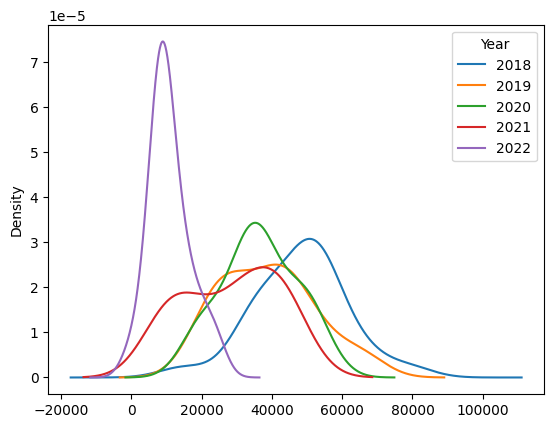

In [7]:
pt['Miles'].plot(kind = 'kde')

<Axes: ylabel='Density'>

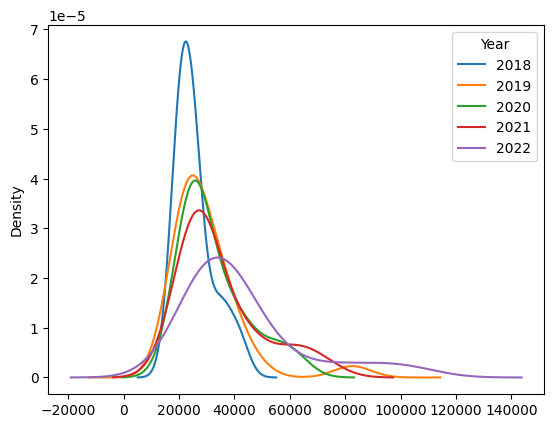

In [8]:
pt['Price'].plot.kde()

### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: power_generation.csv

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
- It is hard to get inside if you look through the only pivot table. So plot the pivot table.

In [9]:
data = pd.read_csv('power_generation.csv')
data.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0


#### `Problem 1`
`In this dataset, there are many columns. Two of them are Actual(MU) and Excess(+) / Shortfall (-). Actual(MU) represents the actual power generation. Excess(+) / Shortfall (-) tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.`

In [10]:
data['required'] = data['Actual(MU)'] - data['Excess(+) / Shortfall (-)']
data.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,required
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0,13.00
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0,28.80
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0,40.37
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0,13.57
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0,38.69


#### `Problem 2`

`Find out the month of the day and store it as a new column.`

In [11]:
data['month'] = pd.to_datetime(data['Dates']).dt.month_name()
data.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,required,month
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0,13.00,September
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0,28.80,September
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0,40.37,September
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0,13.57,September
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0,38.69,September


#### `Problem 3`

`Find out top 10 frequently appeared power stations in this dataframe.`

In [12]:
data['Power Station'].value_counts().head(10).index.tolist()

['NTPC Ltd.',
 'NHPC',
 'NPCIL',
 'GMR ENERG',
 'JSWEL',
 'TATA PCL',
 'IBPIL',
 'APL',
 'JPPVL',
 'NLC']

### `Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* MAke sure you look at columns name carefully

In [13]:
df = pd.read_csv('question-answer.csv')
df.head()

,Unnamed: 0,2
0,0,Q1-What is Data Science?
1,1,"Ans1-Data Science combines statistics, maths, ..."
2,2,Q2-2. How is logistic regression done?
3,3,Ans2-Logistic regression measures the relation...
4,4,Q3-How do you build a random forest model?


In [14]:
#### drop the Unnamed: 0 column
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [15]:
df

,2
0,Q1-What is Data Science?
1,"Ans1-Data Science combines statistics, maths, ..."
2,Q2-2. How is logistic regression done?
3,Ans2-Logistic regression measures the relation...
4,Q3-How do you build a random forest model?
5,Ans3-A random forest is built up of a number o...
6,Q4-How can you avoid overfitting your model?
7,Ans4-Overfitting refers to a model that is onl...
8,Q5-You are given a data set consisting of vari...
9,Ans5-The following are ways to handle missing ...


In [16]:
mask = df['2'].copy().str.startswith('Q')
ques = df[mask].copy()
ques

,2
0,Q1-What is Data Science?
2,Q2-2. How is logistic regression done?
4,Q3-How do you build a random forest model?
6,Q4-How can you avoid overfitting your model?
8,Q5-You are given a data set consisting of vari...
10,Q6-What is bag of words? How we can use it for...
12,Q7-How can we use machine learning for text cl...
14,Q8-What is a time series?
16,Q9-How is time series different from the usual...
18,Q10-What are the different types of joins? Wha...


In [17]:
ques.reset_index(inplace = True)
ques

,index,2
0,0,Q1-What is Data Science?
1,2,Q2-2. How is logistic regression done?
2,4,Q3-How do you build a random forest model?
3,6,Q4-How can you avoid overfitting your model?
4,8,Q5-You are given a data set consisting of vari...
5,10,Q6-What is bag of words? How we can use it for...
6,12,Q7-How can we use machine learning for text cl...
7,14,Q8-What is a time series?
8,16,Q9-How is time series different from the usual...
9,18,Q10-What are the different types of joins? Wha...


In [18]:
ques.drop(columns = 'index', inplace = True)
ques

,2
0,Q1-What is Data Science?
1,Q2-2. How is logistic regression done?
2,Q3-How do you build a random forest model?
3,Q4-How can you avoid overfitting your model?
4,Q5-You are given a data set consisting of vari...
5,Q6-What is bag of words? How we can use it for...
6,Q7-How can we use machine learning for text cl...
7,Q8-What is a time series?
8,Q9-How is time series different from the usual...
9,Q10-What are the different types of joins? Wha...


In [19]:
ques.rename(mapper = {'2':'questions'}, axis = 1, inplace = True)
ques

,questions
0,Q1-What is Data Science?
1,Q2-2. How is logistic regression done?
2,Q3-How do you build a random forest model?
3,Q4-How can you avoid overfitting your model?
4,Q5-You are given a data set consisting of vari...
5,Q6-What is bag of words? How we can use it for...
6,Q7-How can we use machine learning for text cl...
7,Q8-What is a time series?
8,Q9-How is time series different from the usual...
9,Q10-What are the different types of joins? Wha...


In [20]:
mask = df['2'].copy().str.startswith('Ans')
ans = df['2'].copy()[mask]
ans = ans.reset_index()
ans = ans.drop(columns = 'index')
ans = ans.rename(columns = {'2': 'answers'})
ans

,answers
0,"Ans1-Data Science combines statistics, maths, ..."
1,Ans2-Logistic regression measures the relation...
2,Ans3-A random forest is built up of a number o...
3,Ans4-Overfitting refers to a model that is onl...
4,Ans5-The following are ways to handle missing ...
5,Ans6-Bag of Words is a representation of text ...
6,Ans7-Machine learning classification algorithm...
7,Ans8-A time series is a set of observations or...
8,Ans9-The principle behind causal forecasting i...
9,Ans10-(INNER) JOIN: Returns records that have ...


In [21]:
final = pd.concat([ques, ans], axis = 1)
final

,questions,answers
0,Q1-What is Data Science?,"Ans1-Data Science combines statistics, maths, ..."
1,Q2-2. How is logistic regression done?,Ans2-Logistic regression measures the relation...
2,Q3-How do you build a random forest model?,Ans3-A random forest is built up of a number o...
3,Q4-How can you avoid overfitting your model?,Ans4-Overfitting refers to a model that is onl...
4,Q5-You are given a data set consisting of vari...,Ans5-The following are ways to handle missing ...
5,Q6-What is bag of words? How we can use it for...,Ans6-Bag of Words is a representation of text ...
6,Q7-How can we use machine learning for text cl...,Ans7-Machine learning classification algorithm...
7,Q8-What is a time series?,Ans8-A time series is a set of observations or...
8,Q9-How is time series different from the usual...,Ans9-The principle behind causal forecasting i...
9,Q10-What are the different types of joins? Wha...,Ans10-(INNER) JOIN: Returns records that have ...


In [22]:
final['questions'] = final['questions'].str.split('-').str.get(1)
final

,questions,answers
0,What is Data Science?,"Ans1-Data Science combines statistics, maths, ..."
1,2. How is logistic regression done?,Ans2-Logistic regression measures the relation...
2,How do you build a random forest model?,Ans3-A random forest is built up of a number o...
3,How can you avoid overfitting your model?,Ans4-Overfitting refers to a model that is onl...
4,You are given a data set consisting of variabl...,Ans5-The following are ways to handle missing ...
5,What is bag of words? How we can use it for te...,Ans6-Bag of Words is a representation of text ...
6,How can we use machine learning for text class...,Ans7-Machine learning classification algorithm...
7,What is a time series?,Ans8-A time series is a set of observations or...
8,How is time series different from the usual re...,Ans9-The principle behind causal forecasting i...
9,What are the different types of joins? What ar...,Ans10-(INNER) JOIN: Returns records that have ...


In [23]:
final['answers'] = final['answers'].str.split('-').str.get(1)
final

,questions,answers
0,What is Data Science?,"Data Science combines statistics, maths, speci..."
1,2. How is logistic regression done?,Logistic regression measures the relationship ...
2,How do you build a random forest model?,A random forest is built up of a number of dec...
3,How can you avoid overfitting your model?,Overfitting refers to a model that is only set...
4,You are given a data set consisting of variabl...,The following are ways to handle missing data ...
5,What is bag of words? How we can use it for te...,Bag of Words is a representation of text that ...
6,How can we use machine learning for text class...,Machine learning classification algorithms pre...
7,What is a time series?,A time series is a set of observations ordered...
8,How is time series different from the usual re...,The principle behind causal forecasting is tha...
9,What are the different types of joins? What ar...,(INNER) JOIN: Returns records that have matchi...


### `Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [24]:
final

,questions,answers
0,What is Data Science?,"Data Science combines statistics, maths, speci..."
1,2. How is logistic regression done?,Logistic regression measures the relationship ...
2,How do you build a random forest model?,A random forest is built up of a number of dec...
3,How can you avoid overfitting your model?,Overfitting refers to a model that is only set...
4,You are given a data set consisting of variabl...,The following are ways to handle missing data ...
5,What is bag of words? How we can use it for te...,Bag of Words is a representation of text that ...
6,How can we use machine learning for text class...,Machine learning classification algorithms pre...
7,What is a time series?,A time series is a set of observations ordered...
8,How is time series different from the usual re...,The principle behind causal forecasting is tha...
9,What are the different types of joins? What ar...,(INNER) JOIN: Returns records that have matchi...


In [25]:
final['questions'].str.contains('\?')

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: questions, dtype: bool

In [26]:
mask = ~(final['questions'].str.contains('\?'))
final[mask]

,questions,answers


### `Q 6-10` LOG and EMPLOYEE
6. Show `activity` details month wise. Show count for each `activity`
7. Find employee who did most `activity` in January month.
8. Employee who have worked most no of times on Weekends.
9. Which activity is logged most on buisness days.
10. Week Days wise activity table.
```
log_file = pd.read_csv("equip_log.csv")
employee = pd.read_csv("employee.csv")

```

Note(for common field):- Employee file has `EMPLOYEE_ID` and LOG file has `emp_id`

In [27]:
activity = pd.read_csv('equip_log.csv')
activity

,Log_ID,dt,dept,emp_id,activity,eqpt
0,1000,2022-01-07,Dept6,115,Cleaning,UPS
1,1001,2022-01-08,Dept4,105,Cleaning,Generator
2,1002,2022-01-09,Dept3,112,Inspection,CPU
3,1003,2022-01-10,Dept4,120,Inspection,UPS
4,1004,2022-01-11,Dept3,138,Checking,Battery
...,...,...,...,...,...,...
360,1360,2023-01-02,Dept2,122,Repair,AC
361,1361,2023-01-03,Dept4,116,Checking,Server
362,1362,2023-01-04,Dept4,110,Checking,CPU
363,1363,2023-01-05,Dept4,102,Inspection,AC


In [28]:
employee = pd.read_csv("employee.csv")
employee

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST
5,105,David,Austin,DAUSTIN
6,106,Valli,Pataballa,VPATABAL
7,107,Diana,Lorentz,DLORENTZ
8,108,Nancy,Greenberg,NGREENBE
9,109,Daniel,Faviet,DFAVIET


#### `Problem 1`
`Show activity details month wise. Show count for each activity`

In [29]:
activity

,Log_ID,dt,dept,emp_id,activity,eqpt
0,1000,2022-01-07,Dept6,115,Cleaning,UPS
1,1001,2022-01-08,Dept4,105,Cleaning,Generator
2,1002,2022-01-09,Dept3,112,Inspection,CPU
3,1003,2022-01-10,Dept4,120,Inspection,UPS
4,1004,2022-01-11,Dept3,138,Checking,Battery
...,...,...,...,...,...,...
360,1360,2023-01-02,Dept2,122,Repair,AC
361,1361,2023-01-03,Dept4,116,Checking,Server
362,1362,2023-01-04,Dept4,110,Checking,CPU
363,1363,2023-01-05,Dept4,102,Inspection,AC


In [30]:
activity.groupby('activity').size().sort_values(ascending = False)

activity
Inspection    100
Repair         91
Cleaning       88
Checking       86
dtype: int64

#### `Problem 2`

`Find employee who did most activity in January month.`

In [31]:
activity.head()

,Log_ID,dt,dept,emp_id,activity,eqpt
0,1000,2022-01-07,Dept6,115,Cleaning,UPS
1,1001,2022-01-08,Dept4,105,Cleaning,Generator
2,1002,2022-01-09,Dept3,112,Inspection,CPU
3,1003,2022-01-10,Dept4,120,Inspection,UPS
4,1004,2022-01-11,Dept3,138,Checking,Battery


In [32]:
employee.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST


In [33]:
employee = employee.rename(mapper = {'EMPLOYEE_ID':'emp_id'}, axis = 1)
employee.head()

,emp_id,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST


In [34]:
final = employee.merge(activity, on = 'emp_id', how = 'inner')
final.head()

,emp_id,FIRST_NAME,LAST_NAME,EMAIL,Log_ID,dt,dept,activity,eqpt
0,100,Steven,King,SKING,1116,2022-05-03,Dept2,Checking,CPU
1,100,Steven,King,SKING,1139,2022-05-26,Dept2,Cleaning,UPS
2,100,Steven,King,SKING,1181,2022-07-07,Dept6,Cleaning,CPU
3,100,Steven,King,SKING,1191,2022-07-17,Dept4,Cleaning,Server
4,100,Steven,King,SKING,1269,2022-10-03,Dept6,Repair,UPS


In [35]:
final['month'] = pd.to_datetime(final['dt']).dt.month_name()
final.head()

,emp_id,FIRST_NAME,LAST_NAME,EMAIL,Log_ID,dt,dept,activity,eqpt,month
0,100,Steven,King,SKING,1116,2022-05-03,Dept2,Checking,CPU,May
1,100,Steven,King,SKING,1139,2022-05-26,Dept2,Cleaning,UPS,May
2,100,Steven,King,SKING,1181,2022-07-07,Dept6,Cleaning,CPU,July
3,100,Steven,King,SKING,1191,2022-07-17,Dept4,Cleaning,Server,July
4,100,Steven,King,SKING,1269,2022-10-03,Dept6,Repair,UPS,October


In [36]:
final.groupby('month').apply(lambda x : x.groupby('emp_id')['activity'].count().\
                             sort_values(ascending = False)).loc['January', ::].head(1).index[0]

122

In [37]:
emp_id_jan = final.groupby('month').apply(lambda x : x.groupby('emp_id')['activity'].count().\
                             sort_values(ascending = False)).loc['January', ::].head(1).index[0]

jan_employee = final[final['emp_id'] == emp_id_jan].head(1)
jan_employee

,emp_id,FIRST_NAME,LAST_NAME,EMAIL,Log_ID,dt,dept,activity,eqpt,month
146,122,Payam,Kaufling,PKAUFLING,1017,2022-01-24,Dept3,Inspection,CPU,January


In [38]:
name = jan_employee['FIRST_NAME'].values[0] + " " + jan_employee['LAST_NAME'].values[0]
name

'Payam Kaufling'

#### `Problem 3`
`Employee who have worked most no of times on Weekends.`

In [39]:
final

,emp_id,FIRST_NAME,LAST_NAME,EMAIL,Log_ID,dt,dept,activity,eqpt,month
0,100,Steven,King,SKING,1116,2022-05-03,Dept2,Checking,CPU,May
1,100,Steven,King,SKING,1139,2022-05-26,Dept2,Cleaning,UPS,May
2,100,Steven,King,SKING,1181,2022-07-07,Dept6,Cleaning,CPU,July
3,100,Steven,King,SKING,1191,2022-07-17,Dept4,Cleaning,Server,July
4,100,Steven,King,SKING,1269,2022-10-03,Dept6,Repair,UPS,October
...,...,...,...,...,...,...,...,...,...,...
290,140,Joshua,Patel,JPATEL,1234,2022-08-29,Dept4,Repair,Fan,August
291,140,Joshua,Patel,JPATEL,1253,2022-09-17,Dept4,Checking,AC,September
292,140,Joshua,Patel,JPATEL,1281,2022-10-15,Dept4,Inspection,CPU,October
293,140,Joshua,Patel,JPATEL,1329,2022-12-02,Dept2,Cleaning,CPU,December


In [40]:
final['day'] = pd.to_datetime(final['dt']).dt.day_name()
final

,emp_id,FIRST_NAME,LAST_NAME,EMAIL,Log_ID,dt,dept,activity,eqpt,month,day
0,100,Steven,King,SKING,1116,2022-05-03,Dept2,Checking,CPU,May,Tuesday
1,100,Steven,King,SKING,1139,2022-05-26,Dept2,Cleaning,UPS,May,Thursday
2,100,Steven,King,SKING,1181,2022-07-07,Dept6,Cleaning,CPU,July,Thursday
3,100,Steven,King,SKING,1191,2022-07-17,Dept4,Cleaning,Server,July,Sunday
4,100,Steven,King,SKING,1269,2022-10-03,Dept6,Repair,UPS,October,Monday
...,...,...,...,...,...,...,...,...,...,...,...
290,140,Joshua,Patel,JPATEL,1234,2022-08-29,Dept4,Repair,Fan,August,Monday
291,140,Joshua,Patel,JPATEL,1253,2022-09-17,Dept4,Checking,AC,September,Saturday
292,140,Joshua,Patel,JPATEL,1281,2022-10-15,Dept4,Inspection,CPU,October,Saturday
293,140,Joshua,Patel,JPATEL,1329,2022-12-02,Dept2,Cleaning,CPU,December,Friday


In [41]:
weekend = ['Saturday', 'Sunday']

final['day'].isin(weekend)

0      False
1      False
2      False
3       True
4      False
       ...  
290    False
291     True
292     True
293    False
294     True
Name: day, Length: 295, dtype: bool

In [42]:
mask = final['day'].isin(weekend)

weekend = final[mask]
weekend

,emp_id,FIRST_NAME,LAST_NAME,EMAIL,Log_ID,dt,dept,activity,eqpt,month,day
3,100,Steven,King,SKING,1191,2022-07-17,Dept4,Cleaning,Server,July,Sunday
12,101,Neena,Kochhar,NKOCHHAR,1246,2022-09-10,Dept1,Repair,AC,September,Saturday
15,102,Lex,De Haan,LDEHAAN,1022,2022-01-29,Dept3,Checking,AC,January,Saturday
18,102,Lex,De Haan,LDEHAAN,1149,2022-06-05,Dept6,Cleaning,CPU,June,Sunday
20,102,Lex,De Haan,LDEHAAN,1260,2022-09-24,Dept2,Inspection,Generator,September,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
285,139,John,Seo,JSEO,1275,2022-10-09,Dept4,Repair,Battery,October,Sunday
288,140,Joshua,Patel,JPATEL,1205,2022-07-31,Dept4,Checking,Battery,July,Sunday
291,140,Joshua,Patel,JPATEL,1253,2022-09-17,Dept4,Checking,AC,September,Saturday
292,140,Joshua,Patel,JPATEL,1281,2022-10-15,Dept4,Inspection,CPU,October,Saturday


In [43]:
weekend.groupby('emp_id')['activity'].count()

emp_id
100    1
101    1
102    4
103    3
105    3
107    1
108    3
109    5
111    2
112    2
114    4
115    2
116    1
118    1
120    4
122    1
123    1
124    3
125    2
126    2
127    3
129    2
130    1
131    2
132    1
133    3
134    3
135    2
136    4
137    1
138    4
139    2
140    4
Name: activity, dtype: int64

In [44]:
_id = weekend.groupby('emp_id')['activity'].count().sort_values(ascending = False).head(1).index[0]

In [45]:
_id

109

#### `Problem 4`

`Which activity is logged most on buisness days.`

In [46]:
final

,emp_id,FIRST_NAME,LAST_NAME,EMAIL,Log_ID,dt,dept,activity,eqpt,month,day
0,100,Steven,King,SKING,1116,2022-05-03,Dept2,Checking,CPU,May,Tuesday
1,100,Steven,King,SKING,1139,2022-05-26,Dept2,Cleaning,UPS,May,Thursday
2,100,Steven,King,SKING,1181,2022-07-07,Dept6,Cleaning,CPU,July,Thursday
3,100,Steven,King,SKING,1191,2022-07-17,Dept4,Cleaning,Server,July,Sunday
4,100,Steven,King,SKING,1269,2022-10-03,Dept6,Repair,UPS,October,Monday
...,...,...,...,...,...,...,...,...,...,...,...
290,140,Joshua,Patel,JPATEL,1234,2022-08-29,Dept4,Repair,Fan,August,Monday
291,140,Joshua,Patel,JPATEL,1253,2022-09-17,Dept4,Checking,AC,September,Saturday
292,140,Joshua,Patel,JPATEL,1281,2022-10-15,Dept4,Inspection,CPU,October,Saturday
293,140,Joshua,Patel,JPATEL,1329,2022-12-02,Dept2,Cleaning,CPU,December,Friday


In [47]:
mask = ~(final['day'].isin(['Saturday', 'Sunday']))

business_days = final[mask]

business_days

,emp_id,FIRST_NAME,LAST_NAME,EMAIL,Log_ID,dt,dept,activity,eqpt,month,day
0,100,Steven,King,SKING,1116,2022-05-03,Dept2,Checking,CPU,May,Tuesday
1,100,Steven,King,SKING,1139,2022-05-26,Dept2,Cleaning,UPS,May,Thursday
2,100,Steven,King,SKING,1181,2022-07-07,Dept6,Cleaning,CPU,July,Thursday
4,100,Steven,King,SKING,1269,2022-10-03,Dept6,Repair,UPS,October,Monday
5,100,Steven,King,SKING,1298,2022-11-01,Dept4,Checking,Generator,November,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
286,139,John,Seo,JSEO,1333,2022-12-06,Dept3,Repair,UPS,December,Tuesday
287,140,Joshua,Patel,JPATEL,1056,2022-03-04,Dept4,Repair,Fan,March,Friday
289,140,Joshua,Patel,JPATEL,1206,2022-08-01,Dept4,Cleaning,CPU,August,Monday
290,140,Joshua,Patel,JPATEL,1234,2022-08-29,Dept4,Repair,Fan,August,Monday


In [50]:
business_days['activity'].value_counts(ascending = False)

activity
Inspection    62
Cleaning      55
Repair        51
Checking      49
Name: count, dtype: int64

In [51]:
business_days['activity'].value_counts(ascending = False).head(1).index[0]

'Inspection'

### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname).

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`

3. Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]